In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd

In [2]:
df = pd.read_csv('data/wines.csv')

y = df['Class']
y_cat = pd.get_dummies(y)
X = df.drop('Class', axis=1)


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

Xsc = sc.fit_transform(X)

In [4]:
from keras.layers import Input, Dense 
from keras.models import Model
import keras.backend as K
from keras.optimizers import RMSprop


/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', 
                      activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 2s 11ms/step - loss: 0.7159 - acc: 0.6742
Epoch 2/20
178/178 [==============================] - 0s 178us/step - loss: 0.2511 - acc: 0.9438
Epoch 3/20
178/178 [==============================] - 0s 171us/step - loss: 0.1908 - acc: 0.9438
Epoch 4/20
178/178 [==============================] - 0s 175us/step - loss: 0.1268 - acc: 0.9663
Epoch 5/20
178/178 [==============================] - 0s 167us/step - loss: 0.0967 - acc: 0.9663
Epoch 6/20
178/178 [==============================] - 0s 180us/step - loss: 0.0649 - acc: 0.9888
Epoch 7/20
178/178 [==============================] - 0s 170us/step - loss: 0.0487 - acc: 0.9888
Epoch 8/20
178/178 [==============================] - 0s 186us/step - loss: 0.0391 - acc: 0.9944
Epoch 9/20
178/178 [==============================] - 0s 193us/step - loss: 0.0624 - acc: 0.9888
Epoch 10/20
178/178 [==============================] - 0s 199us/step - loss: 0.0338 - acc: 0.9944
Epoch 11/20
178/178 [=========

In [7]:
features_function = K.function([inputs], [second_to_last])

In [8]:
features = features_function([Xsc])[0]

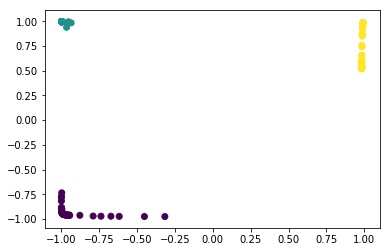

In [10]:
plt.scatter(features[:,0], features[:, 1], c=y)

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [26]:
checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint/weights.hdf5',
                              verbose=1, save_best_only=True)

In [27]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                            patience=1, verbose=1, mode='auto')

In [28]:
tensorboard = TensorBoard(log_dir='/tmp/tensorboard/')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values, test_size=0.2, random_state=42)

In [34]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)
model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, 
         epochs=20, verbose=2,
         validation_data=(X_test, y_test),
         callbacks=[checkpointer, tensorboard])

Train on 142 samples, validate on 36 samples
Epoch 1/20
 - 0s - loss: 0.7720 - acc: 0.6761 - val_loss: 0.3747 - val_acc: 0.9722

Epoch 00001: val_loss did not improve
Epoch 2/20
 - 0s - loss: 0.3394 - acc: 0.9437 - val_loss: 0.2596 - val_acc: 0.9722

Epoch 00002: val_loss did not improve
Epoch 3/20
 - 0s - loss: 0.2115 - acc: 0.9859 - val_loss: 0.1967 - val_acc: 0.9722

Epoch 00003: val_loss did not improve
Epoch 4/20
 - 0s - loss: 0.1843 - acc: 0.9718 - val_loss: 0.1155 - val_acc: 1.0000

Epoch 00004: val_loss did not improve
Epoch 5/20
 - 0s - loss: 0.1411 - acc: 0.9789 - val_loss: 0.1490 - val_acc: 0.9722

Epoch 00005: val_loss did not improve
Epoch 6/20
 - 0s - loss: 0.0929 - acc: 0.9859 - val_loss: 0.0706 - val_acc: 1.0000

Epoch 00006: val_loss improved from 0.10622 to 0.07063, saving model to /tmp/checkpoint/weights.hdf5
Epoch 7/20
 - 0s - loss: 0.0828 - acc: 0.9789 - val_loss: 0.0555 - val_acc: 1.0000

Epoch 00007: val_loss improved from 0.07063 to 0.05548, saving model to /tmp

In [36]:
!tensorboard --logdir='/tmp/tensorboard/'

/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W0324 21:57:34.518036 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0324 21:57:34.520333 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0324 21:57:34.520582 Reloader tf_logging.py:121] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0324 21:57:34.522233 Reloader tf_logging.py:121] Found more than one graph event per run,